# **Exploratory Data Analysis in Python using pandas**

Chanin Nantasenamat

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to perform Exploratory Data Analysis on web scraped data of NBA player stats as obtained in a previous [Jupyter notebook](https://github.com/dataprofessor/code/blob/master/python/pandas_read_html_for_webscraping.ipynb) as discussed on our YouTube video [Easy Web Scraping in Python using Pandas for Data Science](https://www.youtube.com/watch?v=SPu_5EfswIE).

## **Web scraping data using pandas**

The following block of code will retrieve the "2018-19 NBA Player Stats: Per Game" data from http://www.basketball-reference.com/.

In [3]:
# import os
from urllib import request
import pandas as pd
import ssl

# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
html = response.read()
df = pd.read_html(url, header = 0)
df2019 = df[0]

# Data cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

## **Data cleaning**

### Data dimension

In [7]:
raw.shape

(708, 30)

### Dataframe contents

In [9]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


### Check for missing values

In [11]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### Replace missing values with 0 

In [13]:
df = raw.fillna(0)

In [14]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [15]:
df = df.drop(['Rk'], axis=1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


### Write to CSV file

In [17]:
df.to_csv('nba2019.csv', index=False)

In [18]:
! ls

edaProject1.ipynb                      pandas_exploratory_data_analysis.ipynb
nba2019.csv                            yellow_tripdata_2022-01.parquet


In [19]:
! cat nba2019.csv

Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,.306,0.3,1.2,.261,0.3,0.7,.385,.389,0.2,0.2,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,.300,0.0,0.6,.000,0.4,0.9,.500,.300,0.1,0.3,.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
La

## **Exploratory Data Analysis**

### Read data

In [22]:
df = pd.read_csv('nba2019.csv')

#### Displays the dataframe

In [24]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


If we want to see more...

In [26]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [27]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
5,Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,0.306,...,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,0.300,...,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
8,Rawle Alkins,SG,21,CHI,10,1,12.0,1.3,3.9,0.333,...,0.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
9,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,0.376,...,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6


Reverting back to the default

In [29]:
pd.set_option('display.max_rows', 10)

In [30]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


### Overview of data types of each columns in the dataframe

In [32]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
           ...   
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Length: 29, dtype: object

### Show specific data types in dataframe

In [34]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [35]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Álex Abrines,SG,OKC
1,Quincy Acy,PF,PHO
2,Jaylen Adams,PG,ATL
3,Steven Adams,C,OKC
4,Bam Adebayo,C,MIA
...,...,...,...
703,Tyler Zeller,C,MEM
704,Ante Žižić,C,CLE
705,Ivica Zubac,C,TOT
706,Ivica Zubac,C,LAL


## **QUESTIONS**

### **Conditional Selection**

In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.

**Which player scored the most Points (PTS) Per Game?**
Here, we will return the entire row.

In [39]:
df[df.PTS == df.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
270,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


We will return specific column values.

Further question, what team is the player from? 

In [41]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

270    HOU
Name: Tm, dtype: object

Which position is the player playing as?

In [43]:
PlayerMaxPoints.Pos

270    PG
Name: Pos, dtype: object

How many games did the player played in the season?

In [46]:
PlayerMaxPoints.G

270    78
Name: G, dtype: int64

**Which player scored more than 20 Points (PTS) Per Game?**

In [48]:
df[df.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,0.475,...,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
103,Jimmy Butler,SG,29,MIN,10,10,36.1,7.4,15.7,0.471,...,0.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Karl-Anthony Towns,C,23,MIN,77,77,33.1,8.8,17.1,0.518,...,0.836,3.4,9.0,12.4,3.4,0.9,1.6,3.1,3.8,24.4
662,Nikola Vučević,C,28,ORL,80,80,31.4,8.8,16.9,0.518,...,0.789,2.8,9.2,12.0,3.8,1.0,1.1,2.0,2.0,20.8
666,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,0.434,...,0.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6
668,John Wall,PG,28,WAS,32,32,34.5,7.7,17.3,0.444,...,0.697,0.5,3.2,3.6,8.7,1.5,0.9,3.8,2.2,20.7


**Which player had the highest 3-Point Field Goals Per Game (3P) ?**

In [50]:
df[df['3P'] == df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


**Which player had the highest Assists Per Game (AST) ?**

In [52]:
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,...,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


### **GroupBy() function**

**Which player scored the highest (PTS) in the Los Angeles Lakers?**

In [55]:
LAL = df.groupby('Tm').get_group('LAL')

In [56]:
LAL[LAL.PTS == LAL.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
335,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.51,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4


**Of the 5 positions, which position scores the most points?**

We first group players by their positions.

In [58]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,121.0,8.770248,5.595484,0.0,4.200,7.70,12.300,27.5
C-PF,2.0,4.150000,1.202082,3.3,3.725,4.15,4.575,5.0
PF,146.0,7.708219,5.641429,0.0,3.325,6.20,11.100,27.7
PF-SF,2.0,11.200000,7.353911,6.0,8.600,11.20,13.800,16.4
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SF-SG,2.0,15.450000,4.596194,12.2,13.825,15.45,17.075,18.7
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6
SG-PF,1.0,8.600000,NaN,8.6,8.600,8.60,8.600,8.6


We will now show only the 5 traditional positions (those having combo positions will be removed from the analysis).

In [60]:
positions = ['C','PF','SF','PG','SG']
POS = df[ df['Pos'].isin(positions)  ]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


Now, let's take a look at the descriptive statistics.

In [62]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,121.0,8.770248,5.595484,0.0,4.200,7.70,12.300,27.5
PF,146.0,7.708219,5.641429,0.0,3.325,6.20,11.100,27.7
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6


### **Histograms**

We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.

In [65]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[ PTS['Pos'].isin(positions)  ]

PTS

,Pos,PTS
0,SG,5.3
1,PF,1.7
2,PG,3.2
3,C,13.9
4,C,8.9
...,...,...
703,C,11.5
704,C,7.8
705,C,8.9
706,C,8.5


#### **pandas built-in visualization**

array([[<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>],
       [<Axes: title={'center': 'SG'}>, <Axes: >]], dtype=object)

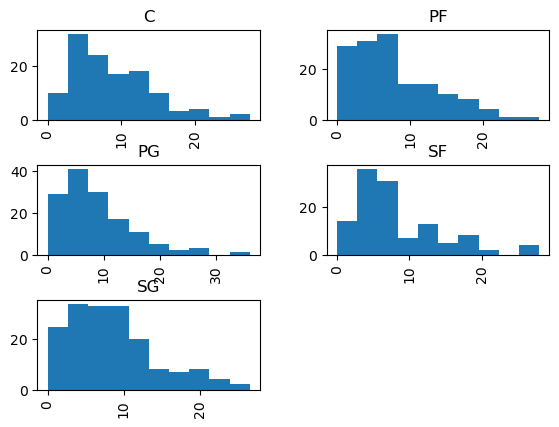

In [67]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>,
       <Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>,
       <Axes: title={'center': 'SG'}>], dtype=object)

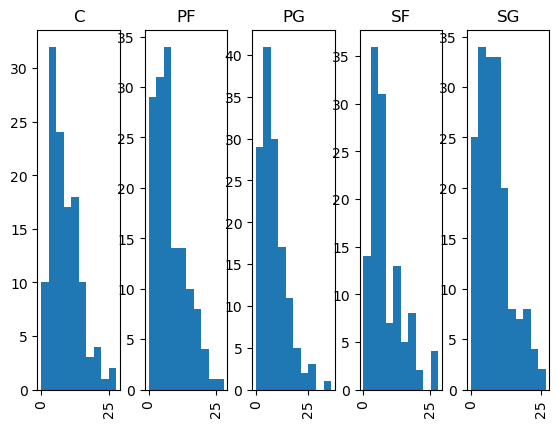

In [68]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>,
       <Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>,
       <Axes: title={'center': 'SG'}>], dtype=object)

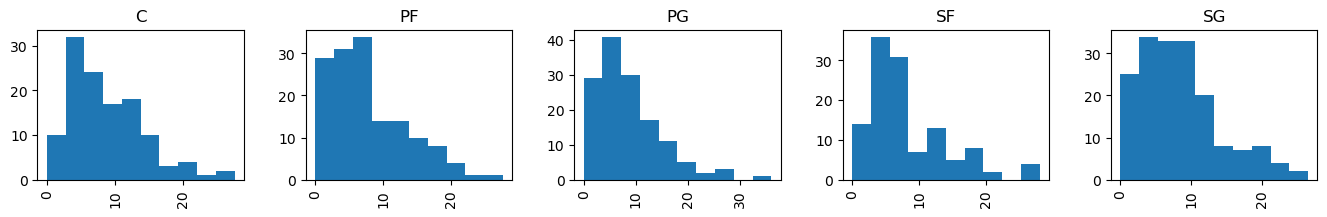

In [69]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))


#### **Seaborn data visualization**

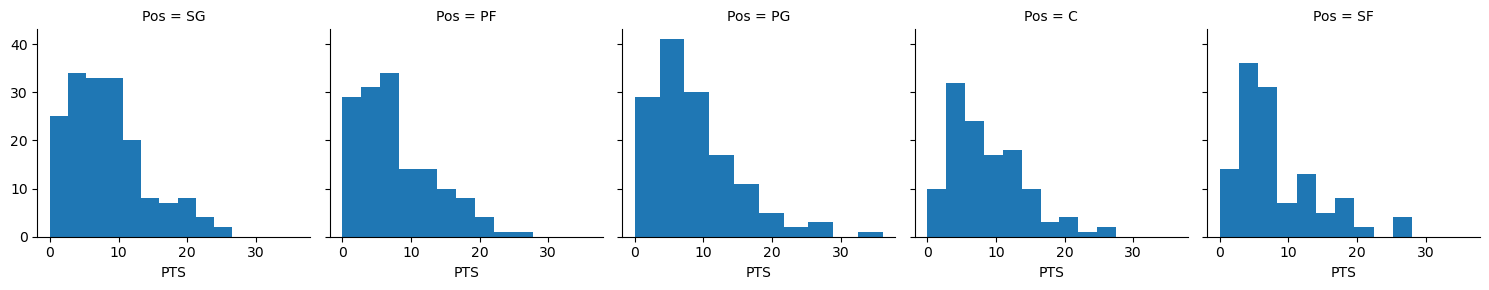

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS");

### **Box plots**

#### **Box plot of points scored (PTS) grouped by Position**

##### **pandas built-in visualization**

<Axes: title={'center': 'PTS'}, xlabel='Pos'>

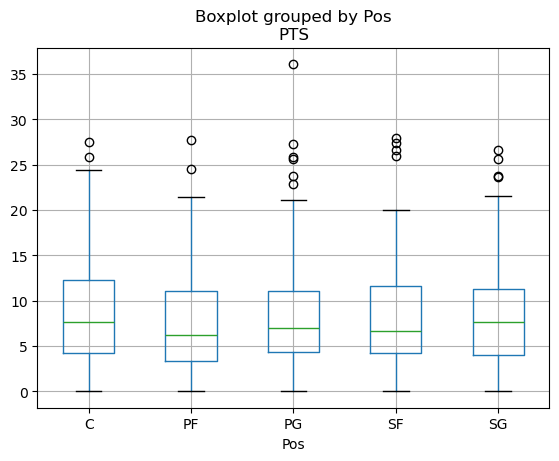

In [75]:
PTS.boxplot(column='PTS', by='Pos')

##### **Seaborn data visualization**

<Axes: xlabel='Pos', ylabel='PTS'>

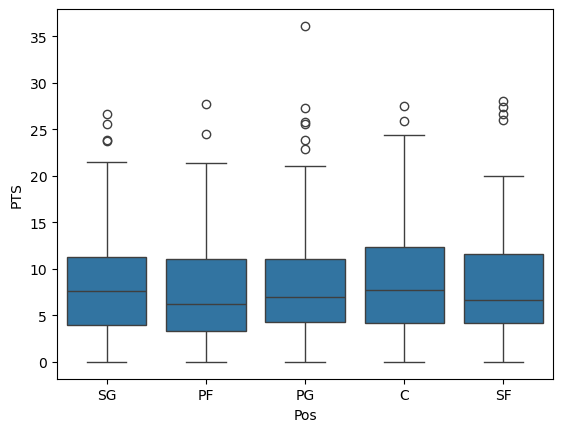

In [77]:
import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 

<Axes: xlabel='Pos', ylabel='PTS'>

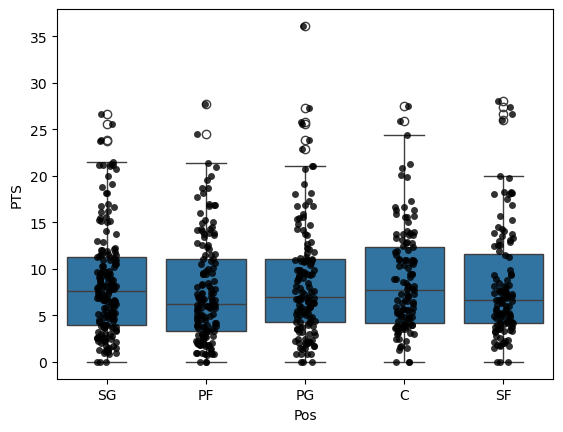

In [78]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### **Heat map**

#### Compute the correlation matrix

In [81]:
corr = df.corr()
corr

ValueError: could not convert string to float: 'Álex Abrines'

#### Make the heat map

In [ ]:
sns.heatmap(corr)

#### Adjust figure size of heat map

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

#### Mask diagonal half of heat map (Diagonal correlation matrix)

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

### **Scatter Plot**

In [ ]:
df

#### Select columns if they have numerical data types

In [ ]:
df.select_dtypes(include=['number'])

#### Select the first 5 columns (by index number)

In [ ]:
number = df.select_dtypes(include=['number'])

In [ ]:
number.iloc[:,:5]

#### Select 5 specific columns (by column names)

In [ ]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

#### Make scatter plot grid

##### 5 columns

In [ ]:
import seaborn as sns

g = sns.PairGrid(df5)
g.map(plt.scatter);

##### All columns

In [ ]:
import seaborn as sns

g = sns.PairGrid(number)
g.map(plt.scatter);